In [1]:
import pandas as pd
import os

In [ ]:
import os
import pandas as pd


def preprocessing_data(root_dir):
    all_data = []

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                try:
                    df = pd.read_csv(file_path)
                    all_data.append(df)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")


    combined_df = pd.concat(all_data, ignore_index=True)

    combined_df['Date'] = pd.to_datetime(combined_df['Date'], dayfirst=True, format='mixed', errors='coerce')



    combined_df = combined_df.sort_values(by='Date')



    return combined_df

root_dir = r"D:\Downloads\data\data\PR"
combined_df=preprocessing_data(root_dir)
combined_df.to_csv("combined_PR.csv")


D:\Downloads\data\data\PR ['combined_PR.csv']
D:\Downloads\data\data\PR\2019-07 ['2019-07-01.csv', '2019-07-06.csv', '2019-07-11.csv', '2019-07-16.csv', '2019-07-21.csv', '2019-07-26.csv', '2019-07-31.csv']
D:\Downloads\data\data\PR\2019-08 ['2019-08-05.csv', '2019-08-10.csv', '2019-08-15.csv', '2019-08-20.csv', '2019-08-25.csv', '2019-08-30.csv']
D:\Downloads\data\data\PR\2019-09 ['2019-09-04.csv', '2019-09-09.csv', '2019-09-14.csv', '2019-09-19.csv', '2019-09-24.csv', '2019-09-29.csv']
D:\Downloads\data\data\PR\2019-10 ['2019-10-04.csv', '2019-10-09.csv', '2019-10-14.csv', '2019-10-19.csv', '2019-10-24.csv', '2019-10-29.csv']
D:\Downloads\data\data\PR\2019-11 ['2019-11-03.csv', '2019-11-08.csv', '2019-11-13.csv', '2019-11-18.csv', '2019-11-23.csv', '2019-11-28.csv']
D:\Downloads\data\data\PR\2019-12 ['2019-12-03.csv', '2019-12-08.csv', '2019-12-13.csv', '2019-12-18.csv', '2019-12-23.csv', '2019-12-28.csv']
D:\Downloads\data\data\PR\2020-01 ['2020-01-02.csv', '2020-01-07.csv', '2020-0

In [ ]:
root_dir = r"D:\Downloads\data\data\GHI"
combined_df=preprocessing_data(root_dir)
combined_df.to_csv("combined_GHI.csv")                 

In [12]:
df=pd.read_csv("combined_GHI.csv")
df1=pd.read_csv("combined_PR.csv")

combined_files=pd.merge(df,df1,on="Date",how="inner")

combined_files['Date']=pd.to_datetime(combined_files['Date'],format='mixed',dayfirst=True,errors='coerce')

combined_files=combined_files.sort_values(by='Date')
combined_files.to_csv("combined_file.csv",index=False)


In [47]:
data=pd.read_csv("combined_file.csv")
data.head(10)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-01,3.256608,69.575676
2,2019-07-01,3.256608,69.575676
3,2019-07-01,3.256608,69.575676
4,2019-07-02,3.976767,79.314411
5,2019-07-02,3.976767,79.314411
6,2019-07-02,3.976767,79.314411
7,2019-07-02,3.976767,79.314411
8,2019-07-03,2.811867,61.020006
9,2019-07-03,2.811867,61.020006


In [48]:
data['GHI']=data['GHI'].round(3)
data['PR']=data['PR'].round(3)

In [49]:
data=data.drop_duplicates(subset="Date")
data.head(10)

,Date,GHI,PR
0,2019-07-01,3.257,69.576
4,2019-07-02,3.977,79.314
8,2019-07-03,2.812,61.020
12,2019-07-04,3.658,83.263
16,2019-07-05,5.591,82.124
20,2019-07-06,5.180,82.764
24,2019-07-07,4.121,69.925
28,2019-07-08,5.708,84.789
32,2019-07-09,6.470,79.152
36,2019-07-10,5.812,69.086


In [50]:
data["PR_30"]=data["PR"].rolling(window=30,min_periods=1).mean()
data["PR_30"]=data["PR_30"].round(3)
data.head(10)

,Date,GHI,PR,PR_30
0,2019-07-01,3.257,69.576,69.576
4,2019-07-02,3.977,79.314,74.445
8,2019-07-03,2.812,61.020,69.970
12,2019-07-04,3.658,83.263,73.293
16,2019-07-05,5.591,82.124,75.059
20,2019-07-06,5.180,82.764,76.343
24,2019-07-07,4.121,69.925,75.427
28,2019-07-08,5.708,84.789,76.597
32,2019-07-09,6.470,79.152,76.881
36,2019-07-10,5.812,69.086,76.101


In [51]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index("Date",inplace=True)

In [29]:
data.head(10)

,GHI,PR,PR_30
Date,,,
2019-07-01,3.257,69.576,69.576
2019-07-02,3.977,79.314,74.445
2019-07-03,2.812,61.020,69.970
2019-07-04,3.658,83.263,73.293
2019-07-05,5.591,82.124,75.059
2019-07-06,5.180,82.764,76.343
2019-07-07,4.121,69.925,75.427
2019-07-08,5.708,84.789,76.597
2019-07-09,6.470,79.152,76.881


In [67]:
def get_budget(date):
    base_value = 73.9
    start_year = 2019
    current_year = date.year
    current_month = date.month
    year_index = (current_year - start_year) if current_month >= 7 else (current_year - start_year - 1)
    return base_value * ((1 - 0.008) ** year_index)

data["Budget_Pr"] = data.index.to_series().apply(get_budget)
data["Budget_Pr"]=data["Budget_Pr"].round(3)


In [68]:
def color(ghi):
    if ghi < 2:
        return 'navy'
    elif ghi < 4:
        return 'lightblue'
    elif ghi < 6:
        return 'orange'
    else:
        return 'brown'

data["Color"] = data["GHI"].apply(color)

In [69]:
data.tail(10)

,GHI,PR,PR_30,Budget_Pr,Color
Date,,,,,
2022-03-15,4.818,69.927,71.597,72.722,orange
2022-03-16,4.771,78.896,71.555,72.722,orange
2022-03-17,4.877,64.724,71.652,72.722,orange
2022-03-18,4.700,67.242,71.559,72.722,orange
2022-03-19,5.915,63.244,70.891,72.722,orange
2022-03-20,4.226,81.633,71.181,72.722,orange
2022-03-21,3.432,71.057,70.790,72.722,lightblue
2022-03-22,3.580,81.632,71.232,72.722,lightblue
2022-03-23,4.998,71.906,71.250,72.722,orange


In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

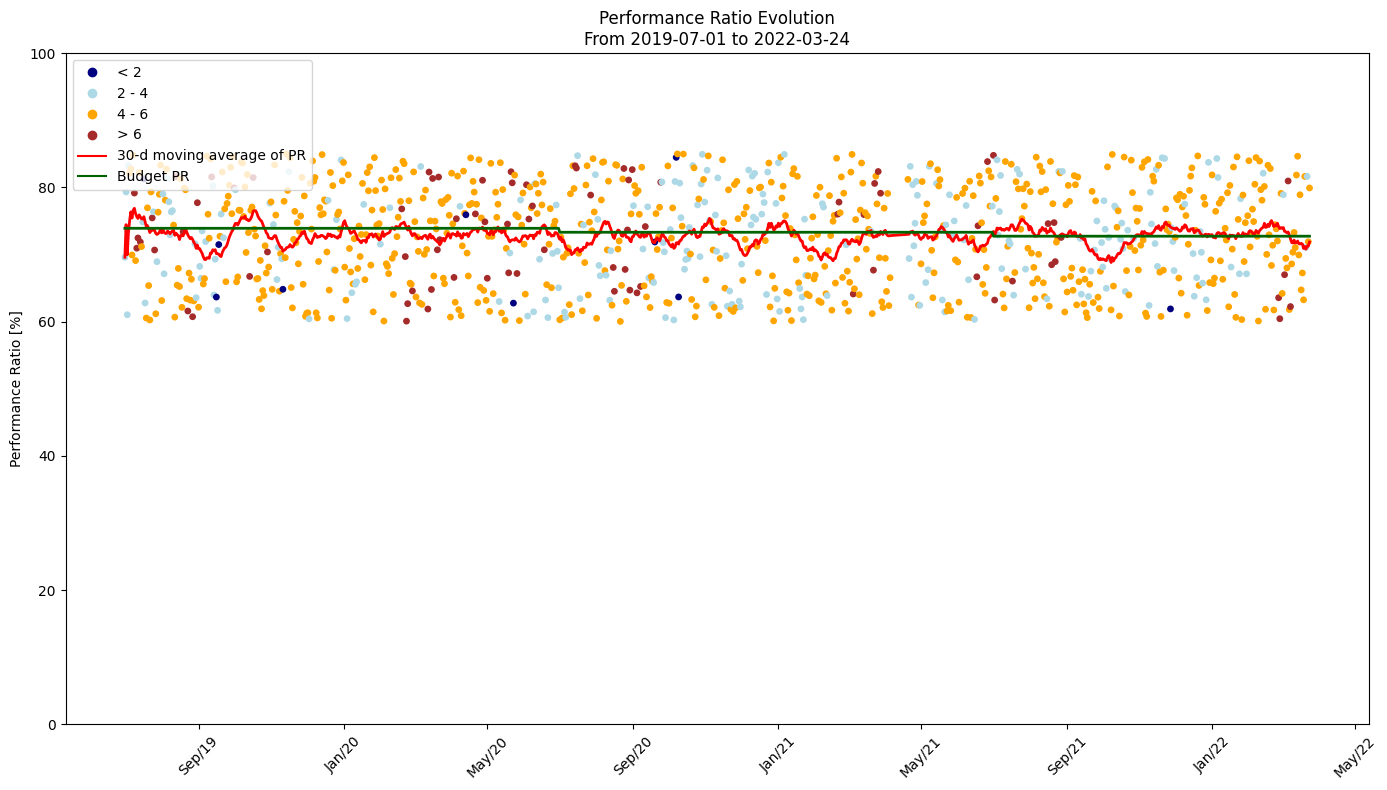

In [75]:
fig, ax = plt.subplots(figsize=(14, 8))


ax.scatter(data.index, data["PR"], c=data["Color"], s=15, label='Daily PR')

ax.plot(data.index, data["PR_30"], color='red', label='30-d moving average of PR', linewidth=2)


ax.plot(data.index, data["Budget_Pr"], color='darkgreen', linestyle='-', linewidth=2,
        label='Target Budget Yield Performance Ratio')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
plt.xticks(rotation=45)


ax.set_ylabel("Performance Ratio [%]")
ax.set_ylim(0, 100)
ax.set_title("Performance Ratio Evolution\nFrom {} to {}".format(data.index.min().date(), data.index.max().date()))



custom_lines = [
    Line2D([0], [0], color='navy', marker='o', linestyle='', label='< 2'),
    Line2D([0], [0], color='lightblue', marker='o', linestyle='', label='2 - 4'),
    Line2D([0], [0], color='orange', marker='o', linestyle='', label='4 - 6'),
    Line2D([0], [0], color='brown', marker='o', linestyle='', label='> 6'),
    Line2D([0], [0], color='red', label='30-d moving average of PR'),
    Line2D([0], [0], color='darkgreen', label='Budget PR')
]
ax.legend(handles=custom_lines, loc='upper left')

plt.tight_layout()
plt.show()
